# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Загрузим данные из файлов и посмотрим на них

In [2]:
def data_read_geo(file_path):
    data = pd.read_csv(file_path)
    display(data.head(15))
    display(data.info())
    print('Дубликаты:', sum(data.duplicated()))
    return data

In [3]:
geo0 = data_read_geo('/datasets/geo_data_0.csv')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


In [4]:
geo1 = data_read_geo('/datasets/geo_data_1.csv')

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


In [5]:
geo2 = data_read_geo('/datasets/geo_data_2.csv')

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


In [6]:
display(geo0.corr())
display(geo1.corr())
display(geo2.corr())
corr0 = geo0.corr()
corr1 = geo1.corr()
corr2 = geo2.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [7]:
corr0.style.background_gradient(cmap='bwr')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [8]:
corr1.style.background_gradient(cmap='bwr')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [9]:
corr2.style.background_gradient(cmap='bwr')

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


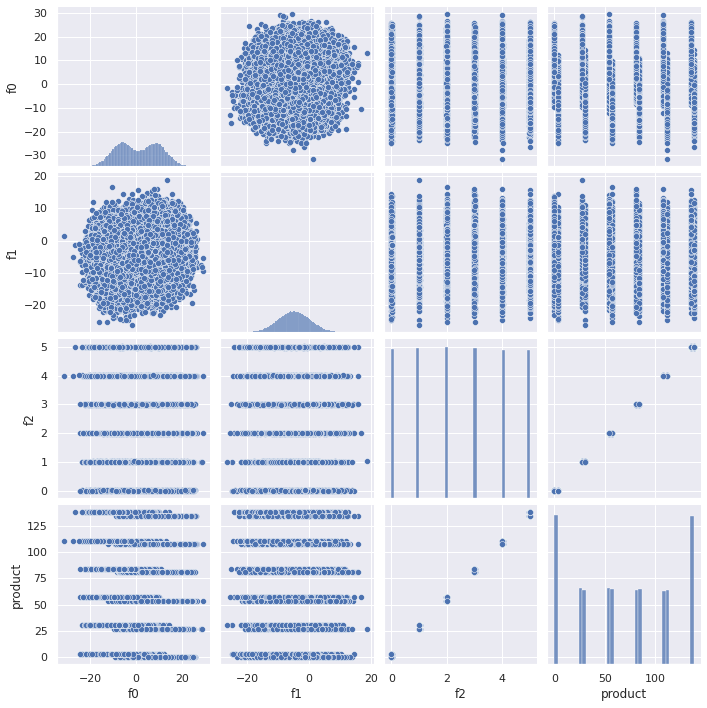

In [32]:
sns.pairplot(geo1)

Построим гистограммы распределений и посмотрим на данные

In [10]:
def hists(data, data_label, num_bins, rug=False, log_scale=False):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 3))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=data, ax=axes[1])
    plt.show()

In [11]:
def region(data, name):
    numerics = ['f0', 'f1', 'f2', 'product']
    for column in numerics:
        hists(data[column], name + ' ' + column, num_bins=20)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


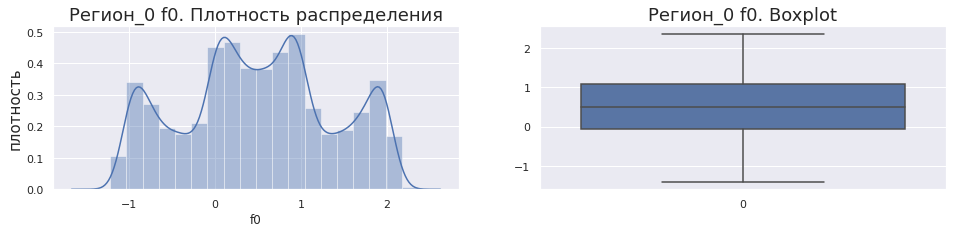

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


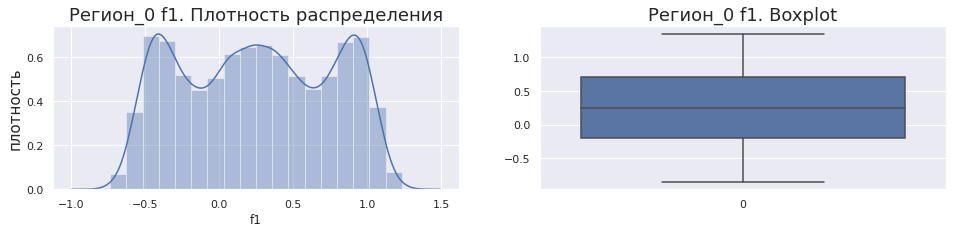

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


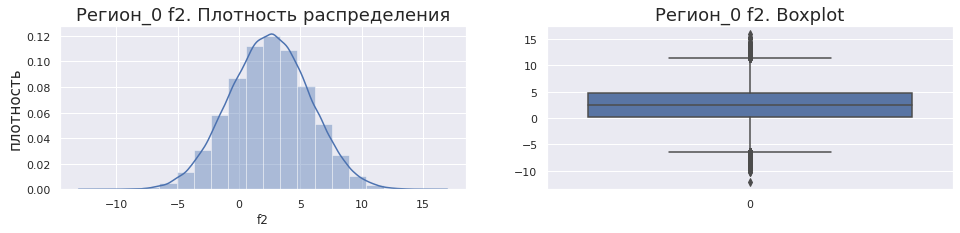

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


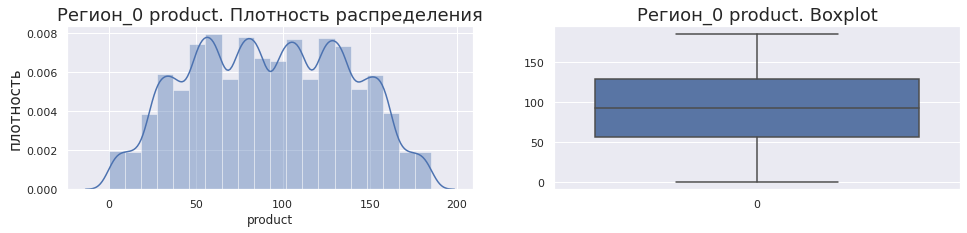

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


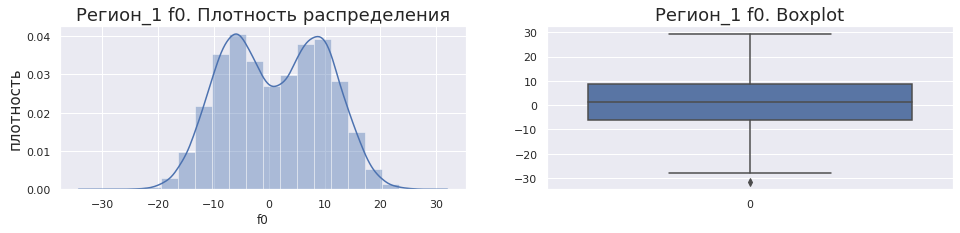

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


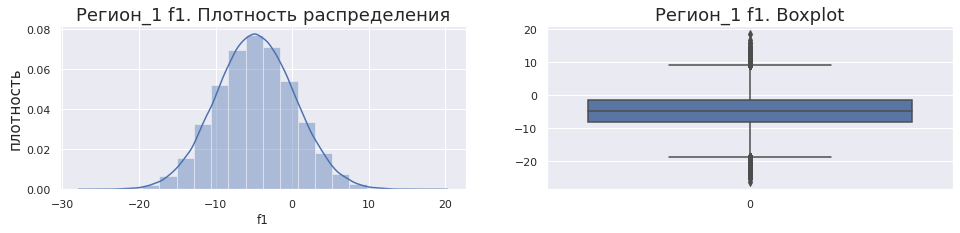

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


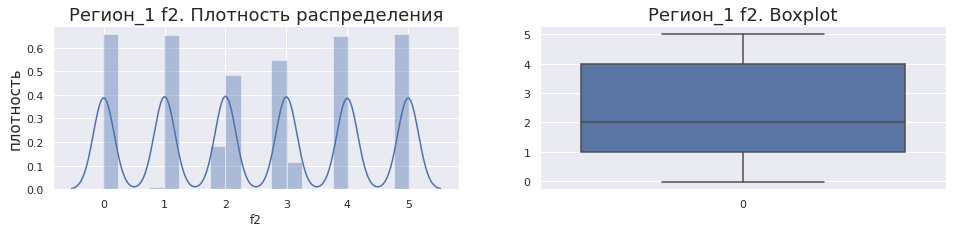

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


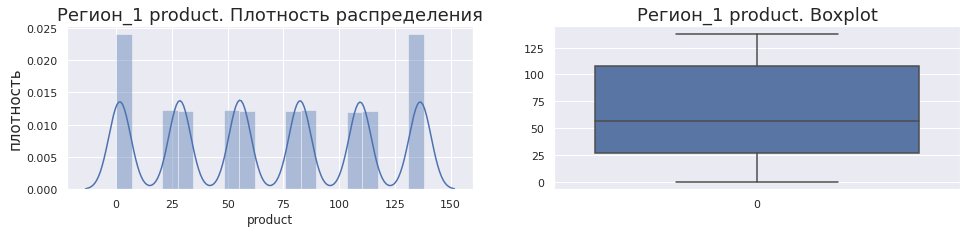

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


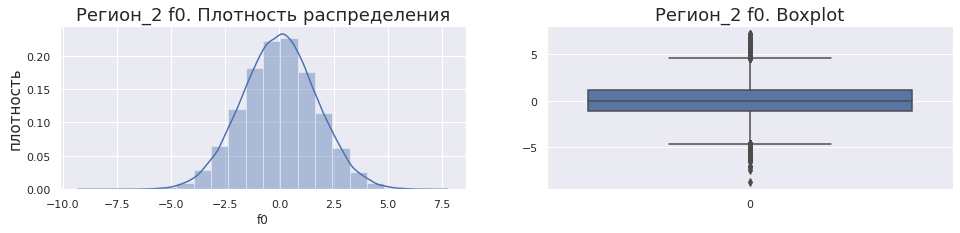

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


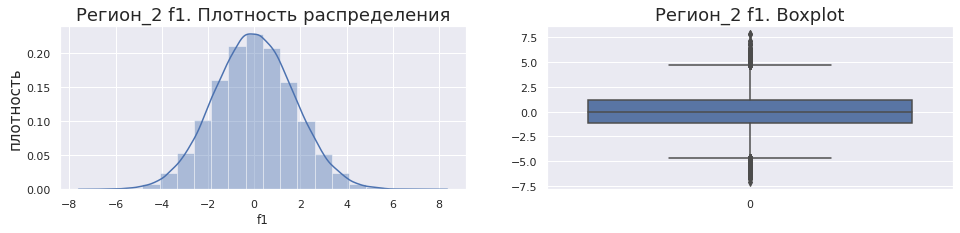

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


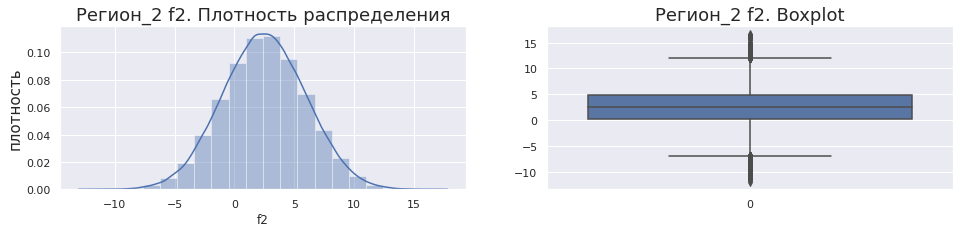

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


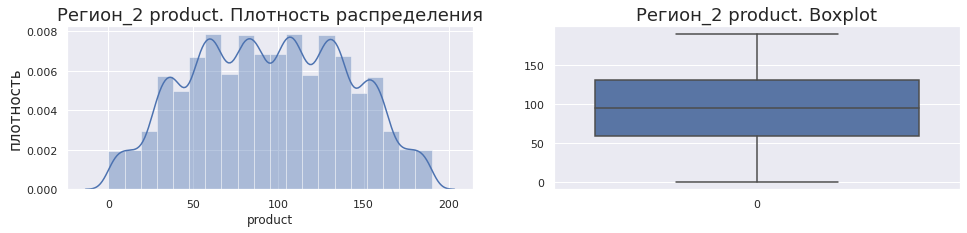

In [12]:
for data, name in [(geo0, 'Регион_0'), (geo1, 'Регион_1'), (geo2, 'Регион_2')]:
    region(data, name)

- Масштабы распределений признаков f0, f1, f2 не сильно отличаются друг от друга (меньше одного порядка). Нет необходимости применять масштабирование.
- Для Региона_1, распределнение запасов в месторождениях отличаются от 0 и 2. есть выраженные пики, где сконцетрированы месторождения.
- Разделим данные на признаки и целевой признак.

Визуализировал для наглядности, сильно кррелирует f2 с product в Регионе 1 т.е между целевым признаком и f2 сильная корреляция, что является хорошим признаком для линейной регресии

### Вывод
- Данные успешно загружены и проанализированы. Данные соответствуют описанию. Дубликатов нет. 
- Распределения некоторых признаков отличаются от нормального. Также присутствуют небольшие выбросы. Но нам неизвестно, что означают сами признаки, сложно оценить адекватность распределений и выбросов. Данные оставлены без изменений.


## Обучение и проверка модели

- разделим данные на целевой признак и признаки

In [13]:
feature = ['f0', 'f1', 'f2']
target = ['product']
X_0 = geo0[feature]
y_0 = geo0[target]
X_1 = geo1[feature]
y_1 = geo1[target]
X_2 = geo2[feature]
y_2 = geo2[target]

- Разделим данные на обучающую и валидационную выборки(75/25), модель использована линейной регрессии, выведем средний запас предсказанного сырья и RMSE модели.

In [14]:
def model_valid(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=123)
    print('Train shape:', X_train.shape)
    print('Valid shape:', X_valid.shape)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_valid)

    predict_mean = predict.mean()
    rmse = mean_squared_error(y_valid, predict)**.5

    print('Cредний запас предсказанного сырья: {:.4f}'.format(predict_mean))
    print('RMSE модели: {:.4f}'.format(rmse))
    
    return y_valid, predict

In [15]:
y_0_valid, predict_0 = model_valid(X_0, y_0)

Train shape: (75000, 3)
Valid shape: (25000, 3)
Cредний запас предсказанного сырья: 92.5494
RMSE модели: 37.6479


In [16]:
y_1_valid, predict_1 = model_valid(X_1, y_1)

Train shape: (75000, 3)
Valid shape: (25000, 3)
Cредний запас предсказанного сырья: 69.2800
RMSE модели: 0.8954


In [17]:
y_2_valid, predict_2 = model_valid(X_2, y_2)

Train shape: (75000, 3)
Valid shape: (25000, 3)
Cредний запас предсказанного сырья: 95.0986
RMSE модели: 40.1280


### Вывод
- В 0 и 2 регионе средние значения объема предсказанного сырья примерно одинаковые(92 и 95). Но RMSE для данных регионов высокий (37.6 и 40.1 соответственно). Что говорит о неоднозначности показателя, неточности модели регрессии.

- В 1 регионе средние запасы нефти ниже(69,2), но и погрешность модели значительно ниже всего 0,89. Это говорит о точности предсказаний и качестве построенной модели.

## Подготовка к расчёту прибыли

- Рассчитаем необходимый объём сырья для безубыточной разработки новой скважины.
- Сравним полученный объём сырья со средним запасом в каждом регионе.


- _min_product = budget / (best_wells * product_income)_
- budget - Бюджет на разработку скважин в регионе — 10 млрд рублей
- best_wells, all_wells - При расчёте выбирают 200 лучших скважин из 500
- product_income - Доход с каждой единицы продукта составляет 450 тыс. рублей

In [18]:
BUDGET = 10**10
BEST_WELLS = 200
ALL_WELLS = 500
PRODUCT_INCOME = 4.5*10**5

In [19]:
min_product = BUDGET / (BEST_WELLS * PRODUCT_INCOME)
print('Достаточный объём сырья для безубыточной разработки новой скважины: {:.2f}'.format(min_product))

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11


### Вывод
- Достаточный объём сырья для безубыточной разработки новой скважины 111.11. Данный показатель рассчитан при условии выбора 200 лучших скважин из 500.
- Это знгачение выше средних значений запасов скважин по всем регионам

## Расчёт прибыли и рисков 

### Прибыль

In [20]:
y_0_valid = pd.Series(y_0_valid['product']).reset_index(drop=True)
y_1_valid = pd.Series(y_1_valid['product']).reset_index(drop=True)
y_2_valid = pd.Series(y_2_valid['product']).reset_index(drop=True)

In [21]:
predict_0 = pd.Series(*predict_0.reshape(1,-1))
predict_1 = pd.Series(*predict_1.reshape(1,-1))
predict_2 = pd.Series(*predict_2.reshape(1,-1))

In [22]:
def predicted_income(region, best_wells_mean, volume, income):
    print(region)
    print('Средний запас сырья среди скважин с максимальным показателем: {:.2f}'.format(best_wells_mean))
    print('Суммарный целевой объём сырья: {:.2f}'.format(volume))
    print('Прибыль для полученного объёма сырья: {:.2f}'.format(income))

In [23]:
state = 123
def predicted_income_all(target, predicts, region, state, replace=False, show_res=True, return_res=False):
    sample_preds = predicts.sample(n=all_wells, 
                                   replace=replace, 
                                   random_state=state)
    top_predictions = sample_preds.sort_values(ascending=False)[:best_wells]
    top_targets = target[top_predictions.index]
    best_wells_mean = top_targets.mean()
    volume = sum(top_targets)
    income = volume * product_income - budget
    if show_res:
        predicted_income(region, best_wells_mean, volume, income)
    if return_res:
        return income

In [24]:
predicted_income_all(y_0_valid, predict_0, 'Регион 0', state)

Регион 0
Средний запас сырья среди скважин с максимальным показателем: 115.39
Суммарный целевой объём сырья: 23078.71
Прибыль для полученного объёма сырья: 385420452.09


In [25]:
predicted_income_all(y_1_valid, predict_1, 'Регион 1', state)

Регион 1
Средний запас сырья среди скважин с максимальным показателем: 114.41
Суммарный целевой объём сырья: 22882.63
Прибыль для полученного объёма сырья: 297182377.93


In [26]:
predicted_income_all(y_2_valid, predict_2, 'Регион 2', state)

Регион 2
Средний запас сырья среди скважин с максимальным показателем: 115.12
Суммарный целевой объём сырья: 23024.03
Прибыль для полученного объёма сырья: 360811278.11


### Риски

In [27]:
def risks(region, income_mean, lower, upper, loss_rate):
    print(region)
    print('Средняя прибыль {:.2f} (млн. Р)'.format(income_mean / 10**6))
    print('95% доверительный интервал: {:.2f} : {:.2f} (млн. Р)'.format(lower / 10**6, upper / 10**6))
    print('Риск убытков: {:.2f} %'.format(loss_rate * 100))

In [28]:
def risk_calcul(target, predicts, region):
    bootstrap_samples = 1000
    alpha = 0.05
    incomes = []
    state = np.random.RandomState(123)
    for i in range(bootstrap_samples):
        income = predicted_income_all(target, predicts, region, state, replace=True, show_res=False, return_res=True)
        incomes.append(income)

    incomes = pd.Series(incomes)
    income_mean = incomes.mean()
    lower = incomes.quantile(alpha/2)
    upper = incomes.quantile(1 - alpha/2)
    
    loss_count = 0
    for inc in incomes :
        if inc < 0 :
            loss_count += 1
    loss_rate = loss_count / bootstrap_samples
  
    
    risks(region, income_mean, lower, upper, loss_rate)
    sns.distplot(incomes, label=i)
    plt.legend(title="Bootstrap distribution")

Регион 0
Средняя прибыль 477.42 (млн. Р)
95% доверительный интервал: -57.99 : 974.82 (млн. Р)
Риск убытков: 4.10 %


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


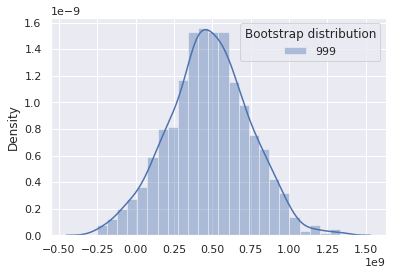

In [29]:

risk_calcul(y_0_valid, predict_0, 'Регион 0')

Регион 1
Средняя прибыль 479.19 (млн. Р)
95% доверительный интервал: 58.73 : 874.42 (млн. Р)
Риск убытков: 0.90 %


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


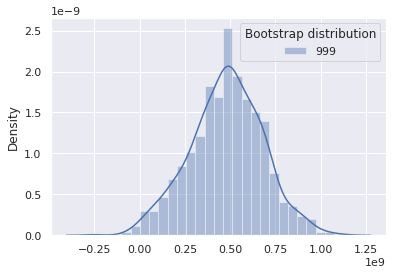

In [30]:

risk_calcul(y_1_valid, predict_1, 'Регион 1')

Регион 2
Средняя прибыль 343.45 (млн. Р)
95% доверительный интервал: -231.38 : 860.84 (млн. Р)
Риск убытков: 9.90 %


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


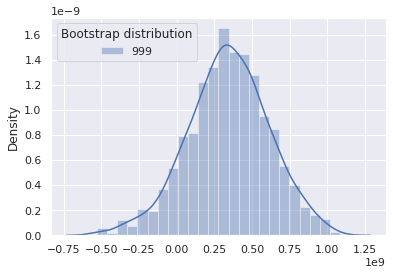

In [31]:

risk_calcul(y_2_valid, predict_2, 'Регион 2')

## Вывод

- Изначально в регионах 0 и 2  высокий средний показатель запаса предсказанного сырья, но и  RMSE для данных регионов высок (37.6 и 40.1 соответственно). Модель регресси неточна
- В регионе 1 средний показатель запаса предсказанного сырья составляет 69.2 (ниже других регионов) RMSE 0,89. Это говорит о точности предсказаний и качестве построенной модели.
- Средние показатели предсказанного сырья для одной скважины ниже теоретически необходимых (111.11)
- При расчёте показателей для 200 наилучших скважин из выборочных 500:
- Средний запас сырья среди скважин с максимальным показателем среди всех регионов выше минимально необходимого объёма и составляет от 114 до 115.
С помощью техники bootstrap вяснили что:
- Средняя прибыль максимальна для региона 1 (479.19 млн.) Регион 0 и Регион 2 - 477 и 343 соответсвенно.
- Самый высокий рис убытков - Регион 2(9,9%) и самый низкий Регион 1(0,9%) 
- Прибыльную разработку по 95% дов.интервалу прогнозирует единственный регион 1(95% доверительный интервал: 58.73 : 874.42 (млн. Р).


_Предпочтительный регион для разработки: Регион 1_